# Gradient Descent Algorithm

In [10]:
import math
import numpy as np
from numpy import random
from matplotlib import cm 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from arftools import *
import matplotlib.pyplot as plt
%matplotlib inline

## Construct a function structure

In [11]:
from collections import namedtuple 
Fonction = namedtuple ( "Fonction",["f","grad","dim"])   #declaration  de  la  structure
def f_id (x):return x                             #definition  de  l  afonction
def f_idgrad (x): return 1                       #definition  du  gradient
identite = Fonction ( f_id , f_idgrad ,1)           #construire  la  structure
identite.f(1),identite.grad(1),identite.dim #u t i l i s e r  la  structure
def v2m(x): 
    return x.reshape((1,x.size)) if len(x.shape)==1 else x

## Create a function 'optimize' which optimizes a continous function  

In [12]:
def optimize(fonc,eps=1e-4,maxiter=100,xinit=None):
    if xinit == None:
        xinit= np.random.rand(100)
    x = xinit
    log_x    = np.array(x)
    log_f    = np.array(fonc.f(x))
    log_grad = np.array(fonc.grad(x))
    cpt = 0
    
    while cpt < maxiter :
        x = x-eps*fonc.grad(x)
        log_x = np.vstack((log_x,x))
        log_f = np.vstack((log_f,fonc.f(x)))
        log_grad = np.vstack((log_grad,fonc.grad(x)))
        cpt += 1 
    return (log_x, log_f, log_grad) 
      

## f(x) = x.cos(x)

In [13]:
def f_cos(x):
    x = np.array(x)
    x = v2m(x)
    return x*math.cos(x)
    
def f_cosgrad(x):
    x = np.array(x)
    x=v2m(x)
    return math.cos(x) - x*math.sin(x)

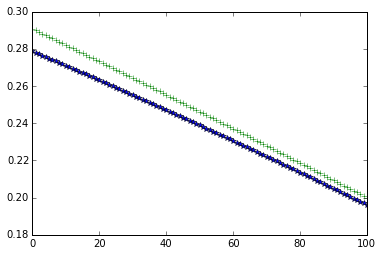

In [19]:
fonc_cos = Fonction (f_cos, f_cosgrad, 1)
log_x, log_f, log_grad = optimize(fonc_cos,0.001,100,random.random(1)*(1))
plt.figure()
plt.plot(range(0, 101), log_x, 'g+')
plt.plot(range(0, 101), log_f, 'b*')    
plt.show()

## f(X) = -log(X)+X**2

In [15]:
def f_log(x):
    x = np.array(x)
    x = v2m(x)
    return -np.log(x)+x**2
    
def f_loggrad(x):
    x = np.array(x)
    x = v2m(x)
    return -1./x + 2*x

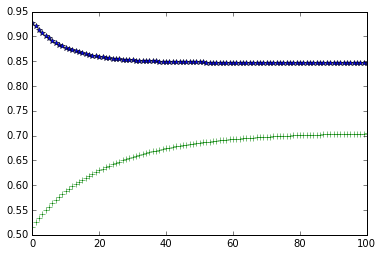

In [16]:
fonc_log = Fonction (f_log, f_loggrad, 1)
log_x, log_f, log_grad = optimize(fonc_log,0.01,100,random.random(1)*(1))
plt.figure()
plt.plot(range(0, 101), log_x, 'g+')
plt.plot(range(0, 101), log_f, 'b*')    
plt.show()

## Rosenbrock Function

In [17]:
def f_Rosenbrock(x):
    x = v2m(x)
    x1 = x[:,0]
    x2 = x[:,1]
    return 100*(x2 - x1**2)**2 + (1 - x1)**2
    
def f_Rosenbrockgrad(x):
    x = v2m(x)
    #print x
    x1 = x[:,0]
    x2 = x[:,1]
    return np.array([200*(x2-x1**2)*(-2*x1)-2*(1-x1),200*(x2-x1**2)]).T

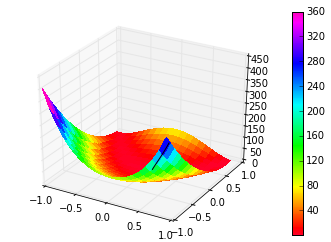

In [18]:
fonc_Rosenbrock = Fonction (f_Rosenbrock, f_Rosenbrockgrad, 1)
log_x, log_f, log_grad = optimize(fonc_Rosenbrock,xinit = np.array(random.random(2)*(1)))      

grid, xx, yy = make_grid(xmin = -1, xmax = 1, ymin = -1, ymax = 1)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, fonc_Rosenbrock.f(grid).reshape(xx.shape), rstride=1, cstride=1, cmap=cm.gist_rainbow,linewidth=0, antialiased=False)   
fig.colorbar(surf)
ax.plot(log_x[:,0],log_x[:,1],log_f.ravel(),color='black')    
plt.show()